## popv本地安装与使用
popv github地址：https://github.com/czbiohub/PopV

google colab示例：https://colab.research.google.com/drive/1Yw4ZDMoPgXNiC1ZQo2eS75Sw8Y_23rrb?usp=sharing

google colab上有诸多限制：运行速度，存储空间等，以及下载的包及数据集无法保存

尝试在服务器上创建popv环境

### 1.安装相关包
```shell
conda create -n popv python=3.7
conda activate popv
git clone https://github.com/czbiohub/PopV.git
pip install --quiet git+https://github.com/czbiohub/PopV
conda install -c anaconda jupyter # 安装jupyter notebook
pip install scanpy # 安装scanpy
```


安装完成后会显示scanpy和TensorFlow有依赖冲突，应该可以忽略

### 2.使用vscode连接服务器
知乎和CSDN有很多教程，虽然由于版本问题每一篇或多或少会有点问题。
如果使用pycharm的话一定要用专业版而不能用社区版
连接完成后将右上方python编译器改为创建的conda环境



### 3.运行流程
#### 3.1导入包
文件夹结构为：
```
popv_pipline/
├── data
│   └── pbmc3k.h5ad
├── model
├── ref_data
└── results
popv.ipynb
PopV
```
这里注意ipynb脚本一定要放在PopV文件同级


In [ ]:
import anndata
import popv
import numpy as np
import scanpy as sc

#### 3.2加载数据

In [2]:
query_adata = anndata.read('./popv_pipline/data/pbmc3k.h5ad')
query_adata

AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'seurat_annotations'
    var: 'features'

In [3]:
#  检查数据是否含有原始表达矩阵
from popv import _check_nonnegative_integers
assert _check_nonnegative_integers(query_adata.X) == True, 'Make sure query_adata.X contains raw_counts'

#### 3.3设置参数
参数说明：
tissue:细胞来源组织，可选的组织有`["Bladder", "Blood", "Bone_Marrow", "Kidney", "Large_Intestine", "Lung","Lymph_Node", "Pancreas", "Small_Intestine", "Spleen", "Thymus","Trachea", "Vasculature"]`设置变量时注意大小写

save_location:保存位置

query_batch_key：`query_adata.obs`中判断批次的关键字，如果不需要修正批次效应则设为`None`

methods:注释方法，共有七种算法`['bbknn','scvi', 'scanvi', 'svm', 'rf', 'onclass', 'scanorama']`，默认全部运行

query_labels_key: SCanvi算法训练时会使用一些已注释的细胞label，这一参数指标签对应的key

unknown_celltype_label:未分类细胞的给出的默认label

In [4]:
tissue = 'Blood'
save_folder = './popv_pipline/results/'

query_batch_key = None
methods = ['bbknn','scvi', 'scanvi', 'svm', 'rf', 'onclass', 'scanorama']

# Lesser used parameters
query_labels_key=None
unknown_celltype_label='unknown'

#### 3.5下载reference data和预训练的模型
这里作者给出了一个信息：
```
NOTE: PopV has only been evaluated with the Lung as a reference dataset. Other tissue results may vary depending on annotation quality
```
popv算法只在肺细胞中被验证过，需要注意

这里最后下载refdata时无法连接，可能是我电脑的代理问题，最后选择了直接下载到本地然后传输
数据大小1.5G，大概十分钟左右下载完成
下载的到本地的话要将文件名从`Blood.h5ad`改为`TS_Blood.h5ad`

In [8]:
# Here we download the necessary data:

if tissue == 'Bladder':
  refdata_url ='https://www.dropbox.com/s/p5x1lb0jyl8293c/Bladder.h5ad?dl=1'
elif tissue == 'Blood':
  refdata_url = 'https://www.dropbox.com/s/4cg6zj340oelhlg/Blood.h5ad?dl=1'
elif tissue == 'Bone_Marrow':
  refdata_url = 'https://www.dropbox.com/s/rwfovoyafpd64io/Bone_Marrow.h5ad?dl=1'
elif tissue == 'Fat':
  refdata_url = 'https://www.dropbox.com/s/if1d7iloovi8e9o/Fat.h5ad?dl=1'
elif tissue == 'Heart':
  refdata_url = 'https://www.dropbox.com/s/0udrdzjl2z087jj/Heart.h5ad?dl=1'
elif tissue == 'Kidney':
  refdata_url = 'https://www.dropbox.com/s/8sx9fhjfgnyjgdz/Kidney.h5ad?dl=1'
elif tissue == 'Large_Intestine':
  refdata_url = 'https://www.dropbox.com/s/272sajn0hkj62le/Large_Intestine.h5ad?dl=1'
elif tissue == 'Liver':
  refdata_url = 'https://www.dropbox.com/s/g0ahumalnm0mp38/Liver.h5ad?dl=1'
elif tissue == 'Lung':
  refdata_url = 'https://www.dropbox.com/s/2kuzdamjevev2ci/Lung.h5ad?dl=1'
elif tissue == 'Lymph_Node':
  refdata_url = 'https://www.dropbox.com/s/tetuh62010uothb/Lymph_Node.h5ad?dl=1'
elif tissue == 'Mammary':
  refdata_url = 'https://www.dropbox.com/s/krm4pv4ev6cynns/Mammary.h5ad?dl=1'
elif tissue == 'Muscle':
  refdata_url = 'https://www.dropbox.com/s/0jhvnoy49rvrlqn/Muscle.h5ad?dl=1'
elif tissue == 'Pancreas':
  refdata_url = 'https://www.dropbox.com/s/kn0zodnmxwx0yhe/Pancreas.h5ad?dl=1'
elif tissue == 'Prostate':
  refdata_url = 'https://www.dropbox.com/s/040fb5jr0zcur7h/Prostate.h5ad?dl=1'
elif tissue == 'Salivary Gland':
  refdata_url = 'https://www.dropbox.com/s/rwia1ji7eztga6b/Salivary_Gland.h5ad?dl=1'
elif tissue == 'Skin':  
  refdata_url = 'https://www.dropbox.com/s/ucvdksq2jnug2nh/Skin.h5ad?dl=1'
elif tissue == 'Small_Intestine':
  refdata_url = 'https://www.dropbox.com/s/06ia5n2yex3dq8j/Small_Intestine.h5ad?dl=1'
elif tissue == 'Spleen':
  refdata_url = 'https://www.dropbox.com/s/m2d0gme847qdhr1/Spleen.h5ad?dl=1'
elif tissue == 'Thymus':
  refdata_url = 'https://www.dropbox.com/s/i84bcyk87scesml/Thymus.h5ad?dl=1'
elif tissue == 'Trachea':
  refdata_url = 'https://www.dropbox.com/s/ppt7b6w73gvceap/Trachea.h5ad?dl=1'
elif tissue == 'Vasculature':
  refdata_url = 'https://www.dropbox.com/s/1eq0zamel5etmoq/Vasculature.h5ad?dl=1'

# Download reference dataset
output_fn = 'TS_{}.h5ad'.format(tissue)
!wget -O ./ref_data/$output_fn $refdata_url

--2022-09-17 21:38:00--  https://www.dropbox.com/s/4cg6zj340oelhlg/Blood.h5ad?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 128.242.240.125, 2001::80f2:f05d
Connecting to www.dropbox.com (www.dropbox.com)|128.242.240.125|:443... ^C


In [5]:
# read in the reference dataset
ref_adata_path = './popv_pipline/ref_data/TS_{}.h5ad'.format(tissue)
ref_adata = anndata.read(ref_adata_path)

#### 3.6设置参考数据集

In [6]:
assert _check_nonnegative_integers(ref_adata.X) == True, 'Make sure ref_adata.X contains raw_counts'
# Following parameters are specific to Tabula Sapiens dataset
ref_labels_key='cell_ontology_class'
ref_batch_key = ['donor', 'method']
min_celltype_size = np.min(ref_adata.obs.groupby('cell_ontology_class').size())
n_samples_per_label = np.max((min_celltype_size, 100))

In [ ]:
# 处理query_data
common_markers = list(set(ref_adata.var.index).intersection(set(query_adata.var.index)))
query_adata_intersection = query_adata[:, common_markers]
ref_adata_intersection = ref_adata[:, common_markers]    
# 这一部分排除query_data中存在而ref_data中不存在的基因，当然原数据集也会因此改变
from popv import process_query

# 这里一定要加上参数`training_mode="offline"`
# 作者在colab的示例中并没有加上，看了源码之后才发现，这里未指定offline的话，下一步未指定scvi的模型路径时是一定报错的
adata = process_query(query_adata_intersection,
                      ref_adata_intersection,
                      save_folder=save_folder,
                      query_batch_key=query_batch_key,
                      query_labels_key=query_labels_key,
                      unknown_celltype_label=unknown_celltype_label,
                      training_mode="offline",
                      pretrained_scvi_path=None,
                      ref_labels_key=ref_labels_key, 
                      ref_batch_key=ref_batch_key,
                      n_samples_per_label=n_samples_per_label)


#### 3.7注释

In [8]:
adata.uns["_training_mode"]

'offline'

In [ ]:
# pbmc3k上跑了接近3个小时
popv.annotate_data(adata,
              methods, 
              save_folder,
              pretrained_scvi_path=None, 
              pretrained_scanvi_path=None,
              onclass_ontology_file="PopV/ontology/cl.ontology",
              onclass_obo_fp="PopV/ontology/cl.obo",
              onclass_emb_fp="PopV/ontology/cl.ontology.nlp.emb",
             )

In [10]:
adata

AnnData object with n_obs × n_vars = 52815 × 4000
    obs: '_batch_annotation', '_labels_annotation', '_dataset', '_ref_subsample', 'n_counts', 'popv_knn_on_bbknn_prediction', '_scvi_batch', '_scvi_labels', 'popv_knn_on_scvi_offline_prediction', 'popv_scanvi_offline_prediction', 'popv_svm_prediction', 'popv_rf_prediction', '_labels_annotation_cell_ontology_id', 'popv_onclass_prediction', 'popv_knn_on_scanorama_prediction', 'popv_majority_vote_prediction', 'popv_majority_vote_score', 'popv_prediction', 'popv_prediction_score'
    var: 'mean', 'std', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: '_training_mode', 'log1p', 'hvg', 'pca', 'neighbors', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'X_pca', 'X_scvi_offline', 'X_scanvi_offline', 'X_scanorama'
    varm: 'PCs'
    layers: 'scvi_counts', 'logcounts'
    obsp: 'distances', 'connectivities'

#### 3.8总结

In [ ]:
# 聚类图
import os
import pandas as pd
import matplotlib

predictions_fn = os.path.join(save_folder, 'predictions.csv')
scvi_latent_space_fn = os.path.join(save_folder, 'scvi_latent.csv')
scanvi_latent_space_fn = os.path.join(save_folder, 'scanvi_latent.csv')

predictions = pd.read_csv(predictions_fn, index_col = 0)
scanvi_latent_space = pd.read_csv(scanvi_latent_space_fn, index_col=0)
scvi_latent_space = pd.read_csv(scvi_latent_space_fn, index_col=0)

for col in predictions.columns:
    query_adata.obs[col] = predictions.loc[query_adata.obs_names][col]

query_adata.obsm['X_scanvi'] = scanvi_latent_space.loc[query_adata.obs_names]
query_adata.obsm['X_scvi'] = scvi_latent_space.loc[query_adata.obs_names]

sc.pp.neighbors(query_adata, use_rep="X_scvi")
sc.tl.umap(query_adata, min_dist=0.3)
sc.pl.umap(query_adata, color='popv_prediction')

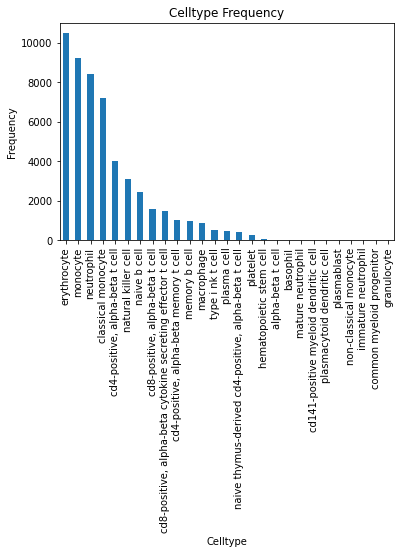

In [12]:
# 细胞类型频数图
ax  = adata.obs['popv_prediction'].value_counts().plot.bar()
ax.set_title('Celltype Frequency')
ax.set_xlabel('Celltype')
ax.set_ylabel('Frequency')
figpath = os.path.join(save_folder, "celltype_frequency.pdf")
ax.get_figure().savefig(figpath, bbox_inches='tight', dpi=300)

Making confusion matrix for popv_knn_on_bbknn_prediction
Making confusion matrix for popv_knn_on_scvi_offline_prediction
Making confusion matrix for popv_scanvi_offline_prediction
Making confusion matrix for popv_svm_prediction
Making confusion matrix for popv_rf_prediction
Making confusion matrix for popv_onclass_prediction
Making confusion matrix for popv_knn_on_scanorama_prediction


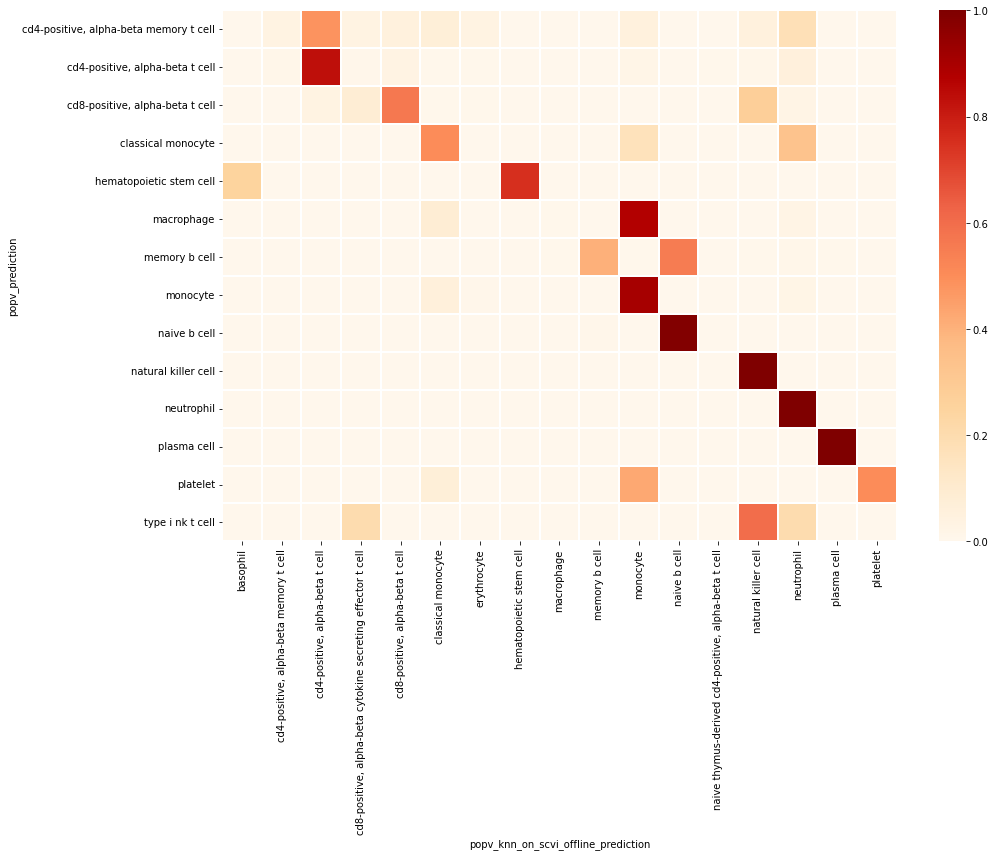

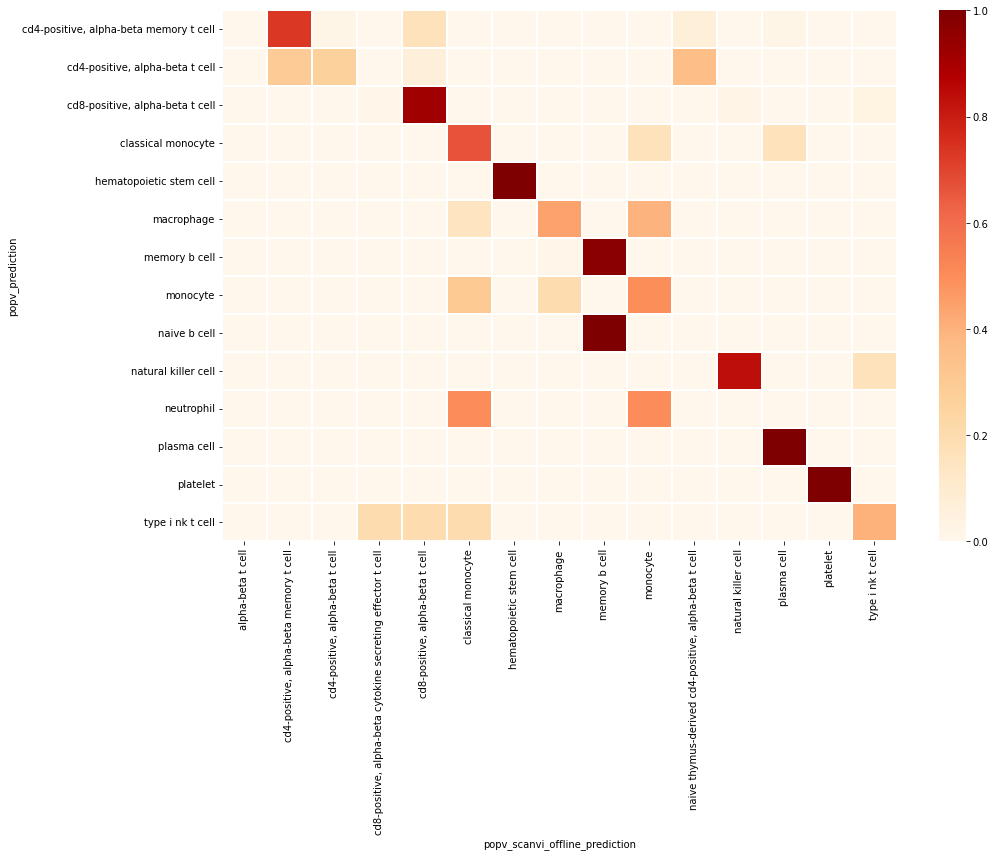

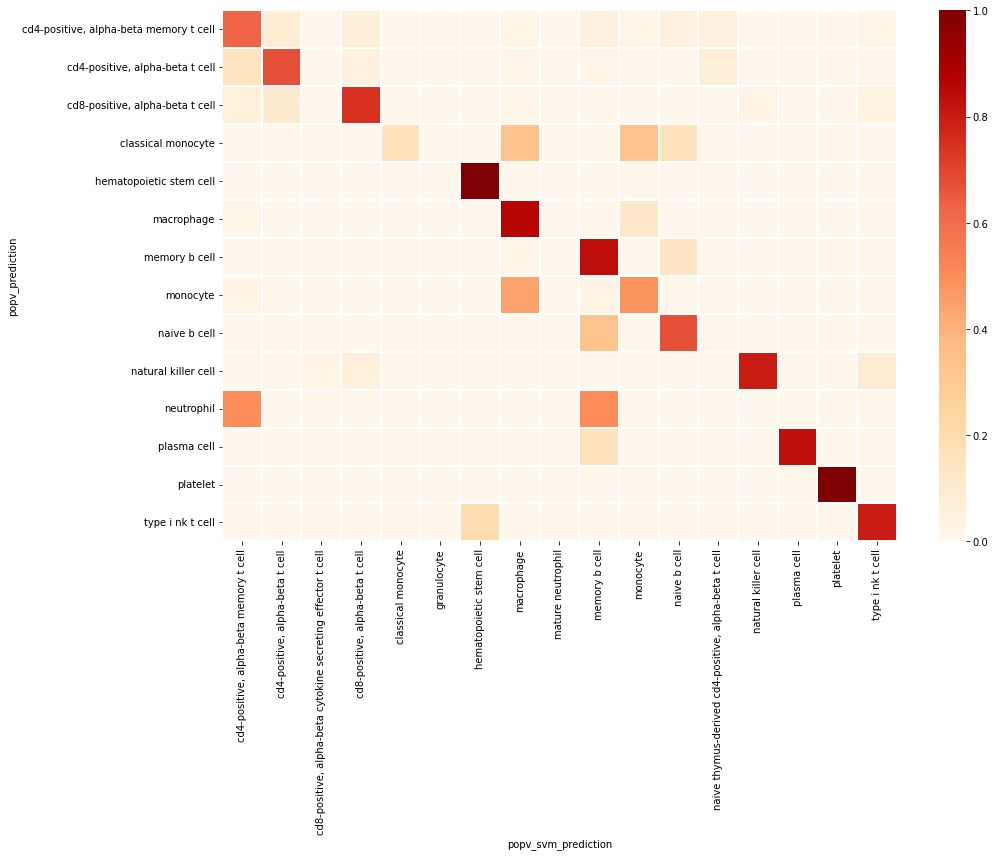

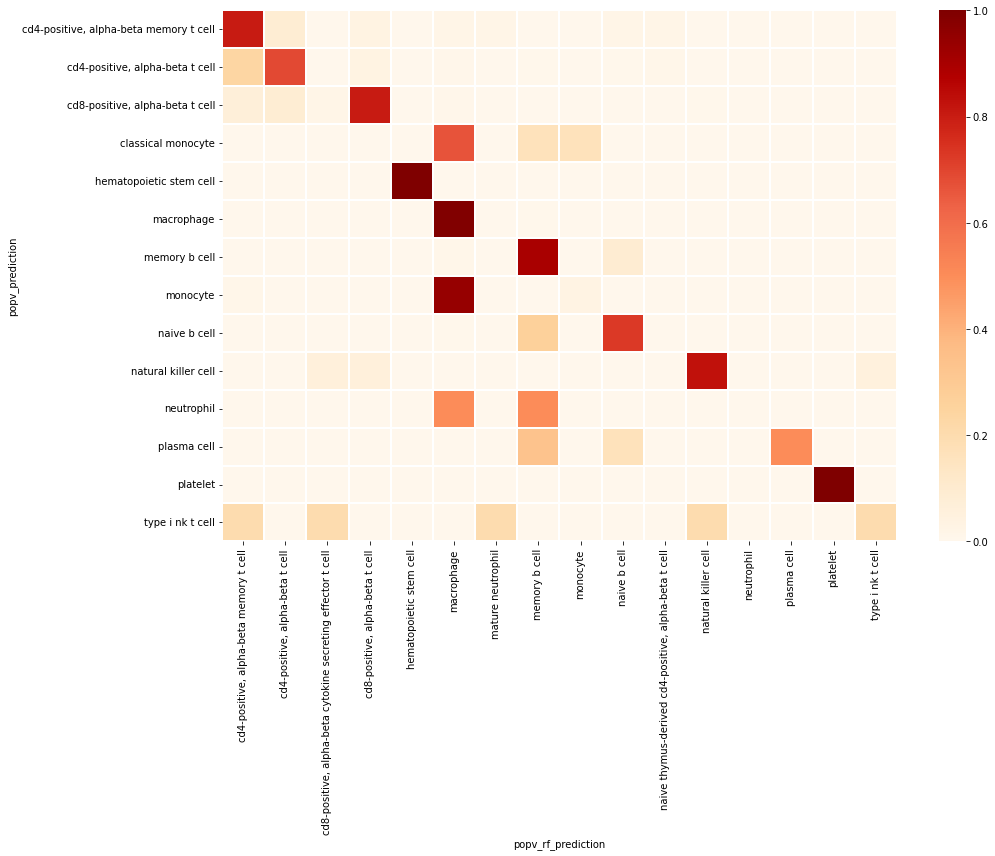

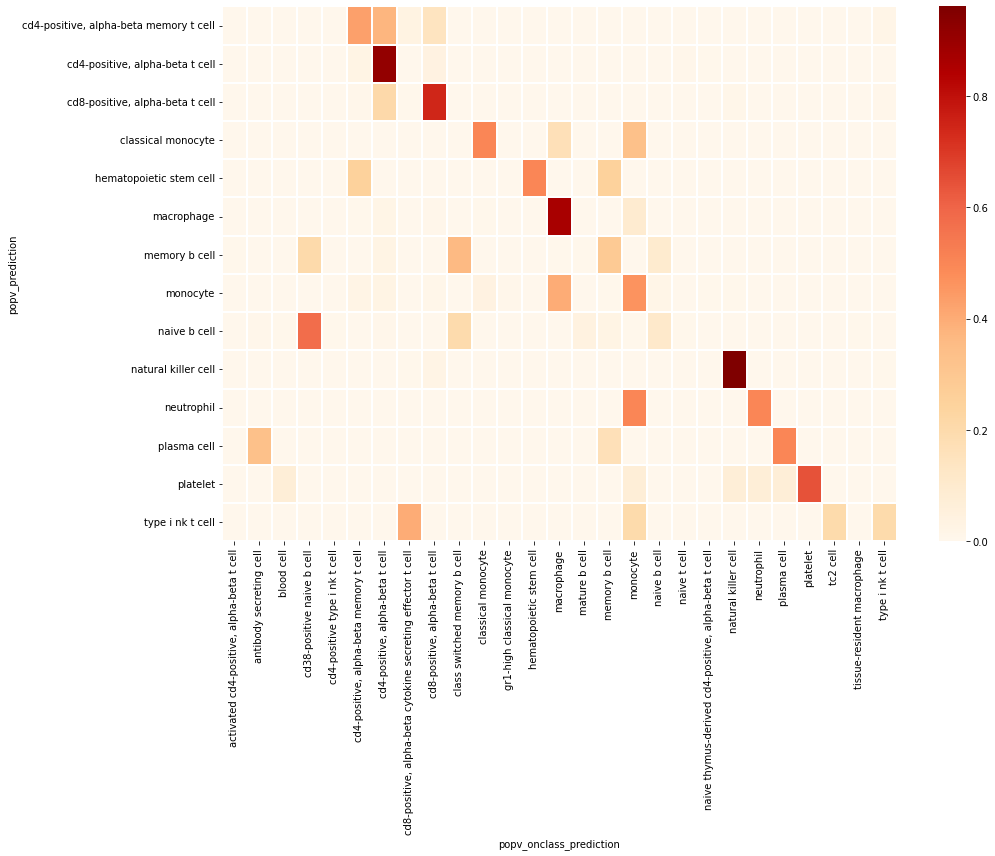

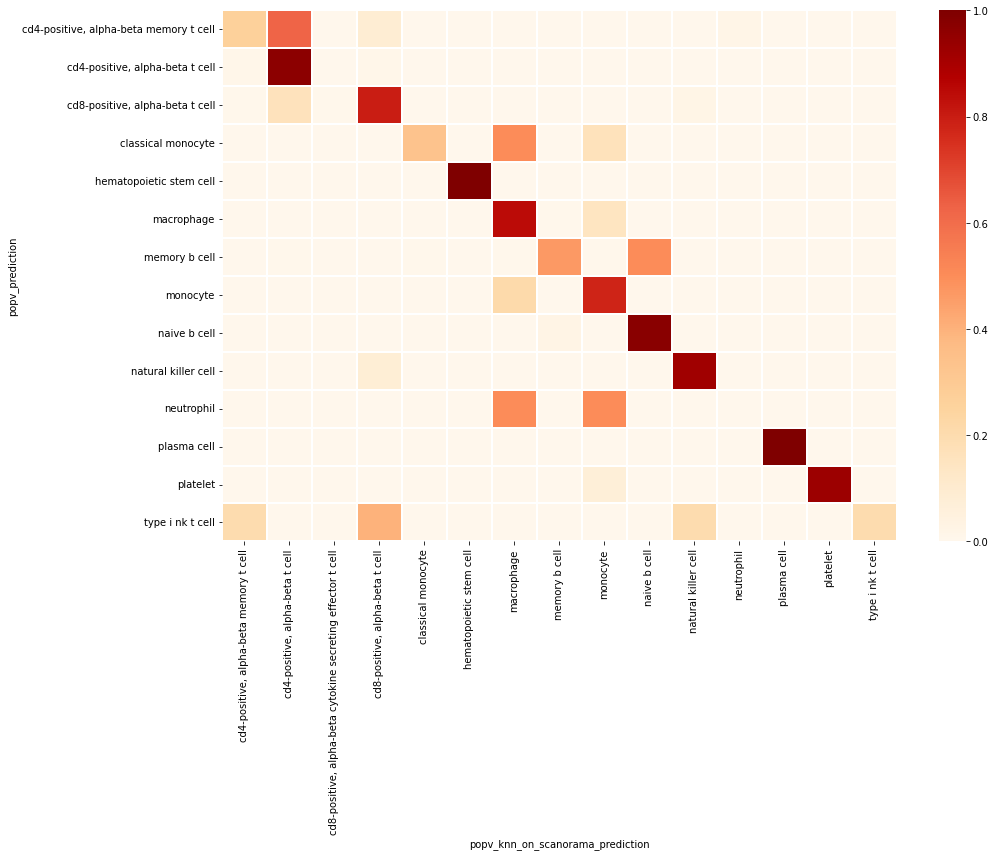

In [13]:
# 和原始注释结果的比对
from popv import make_agreement_plots

all_prediction_keys = [
        "popv_knn_on_bbknn_prediction",
        "popv_knn_on_scvi_online_prediction",
        "popv_knn_on_scvi_offline_prediction",
        "popv_scanvi_online_prediction",
        "popv_scanvi_offline_prediction",
        "popv_svm_prediction",
        "popv_rf_prediction",
        "popv_onclass_prediction",
        "popv_knn_on_scanorama_prediction",
    ]

obs_keys = query_adata.obs.keys()

pred_keys = [key for key in obs_keys if key in all_prediction_keys]
make_agreement_plots(query_adata,
                     methods=pred_keys, 
                     popv_prediction_key = 'popv_prediction',
                     save_folder=save_folder)

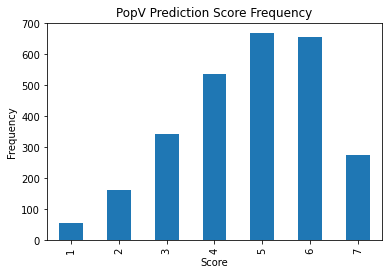

In [14]:
# 得分的频数分布，得分表示有几个模型预测了相同结果
ax = query_adata.obs['popv_prediction_score'].value_counts().sort_index().plot.bar()

ax.set_xlabel('Score')
ax.set_ylabel("Frequency")
ax.set_title("PopV Prediction Score Frequency")
figpath = os.path.join(save_folder, "prediction_score_barplot.pdf")
ax.get_figure().savefig(figpath, bbox_inches="tight", dpi=300)

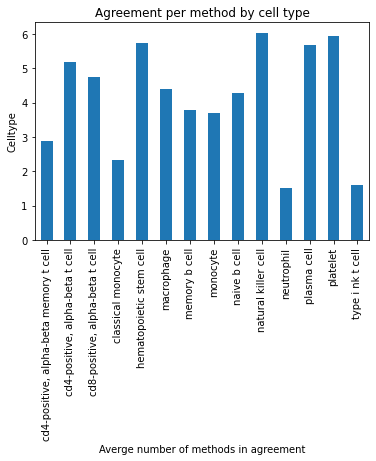

In [15]:
ax = query_adata.obs.groupby('popv_prediction')['popv_prediction_score'].mean().plot.bar()
ax.set_ylabel('Celltype')
ax.set_xlabel('Averge number of methods in agreement')
ax.set_title('Agreement per method by cell type')
figpath = os.path.join(save_folder, "percelltype_agreement_barplot.pdf")

ax.get_figure().savefig(figpath, bbox_inches='tight', dpi=300)